In [27]:
!cd ~/Desktop/
#!pwd

## Plotting parcel volume - by subject

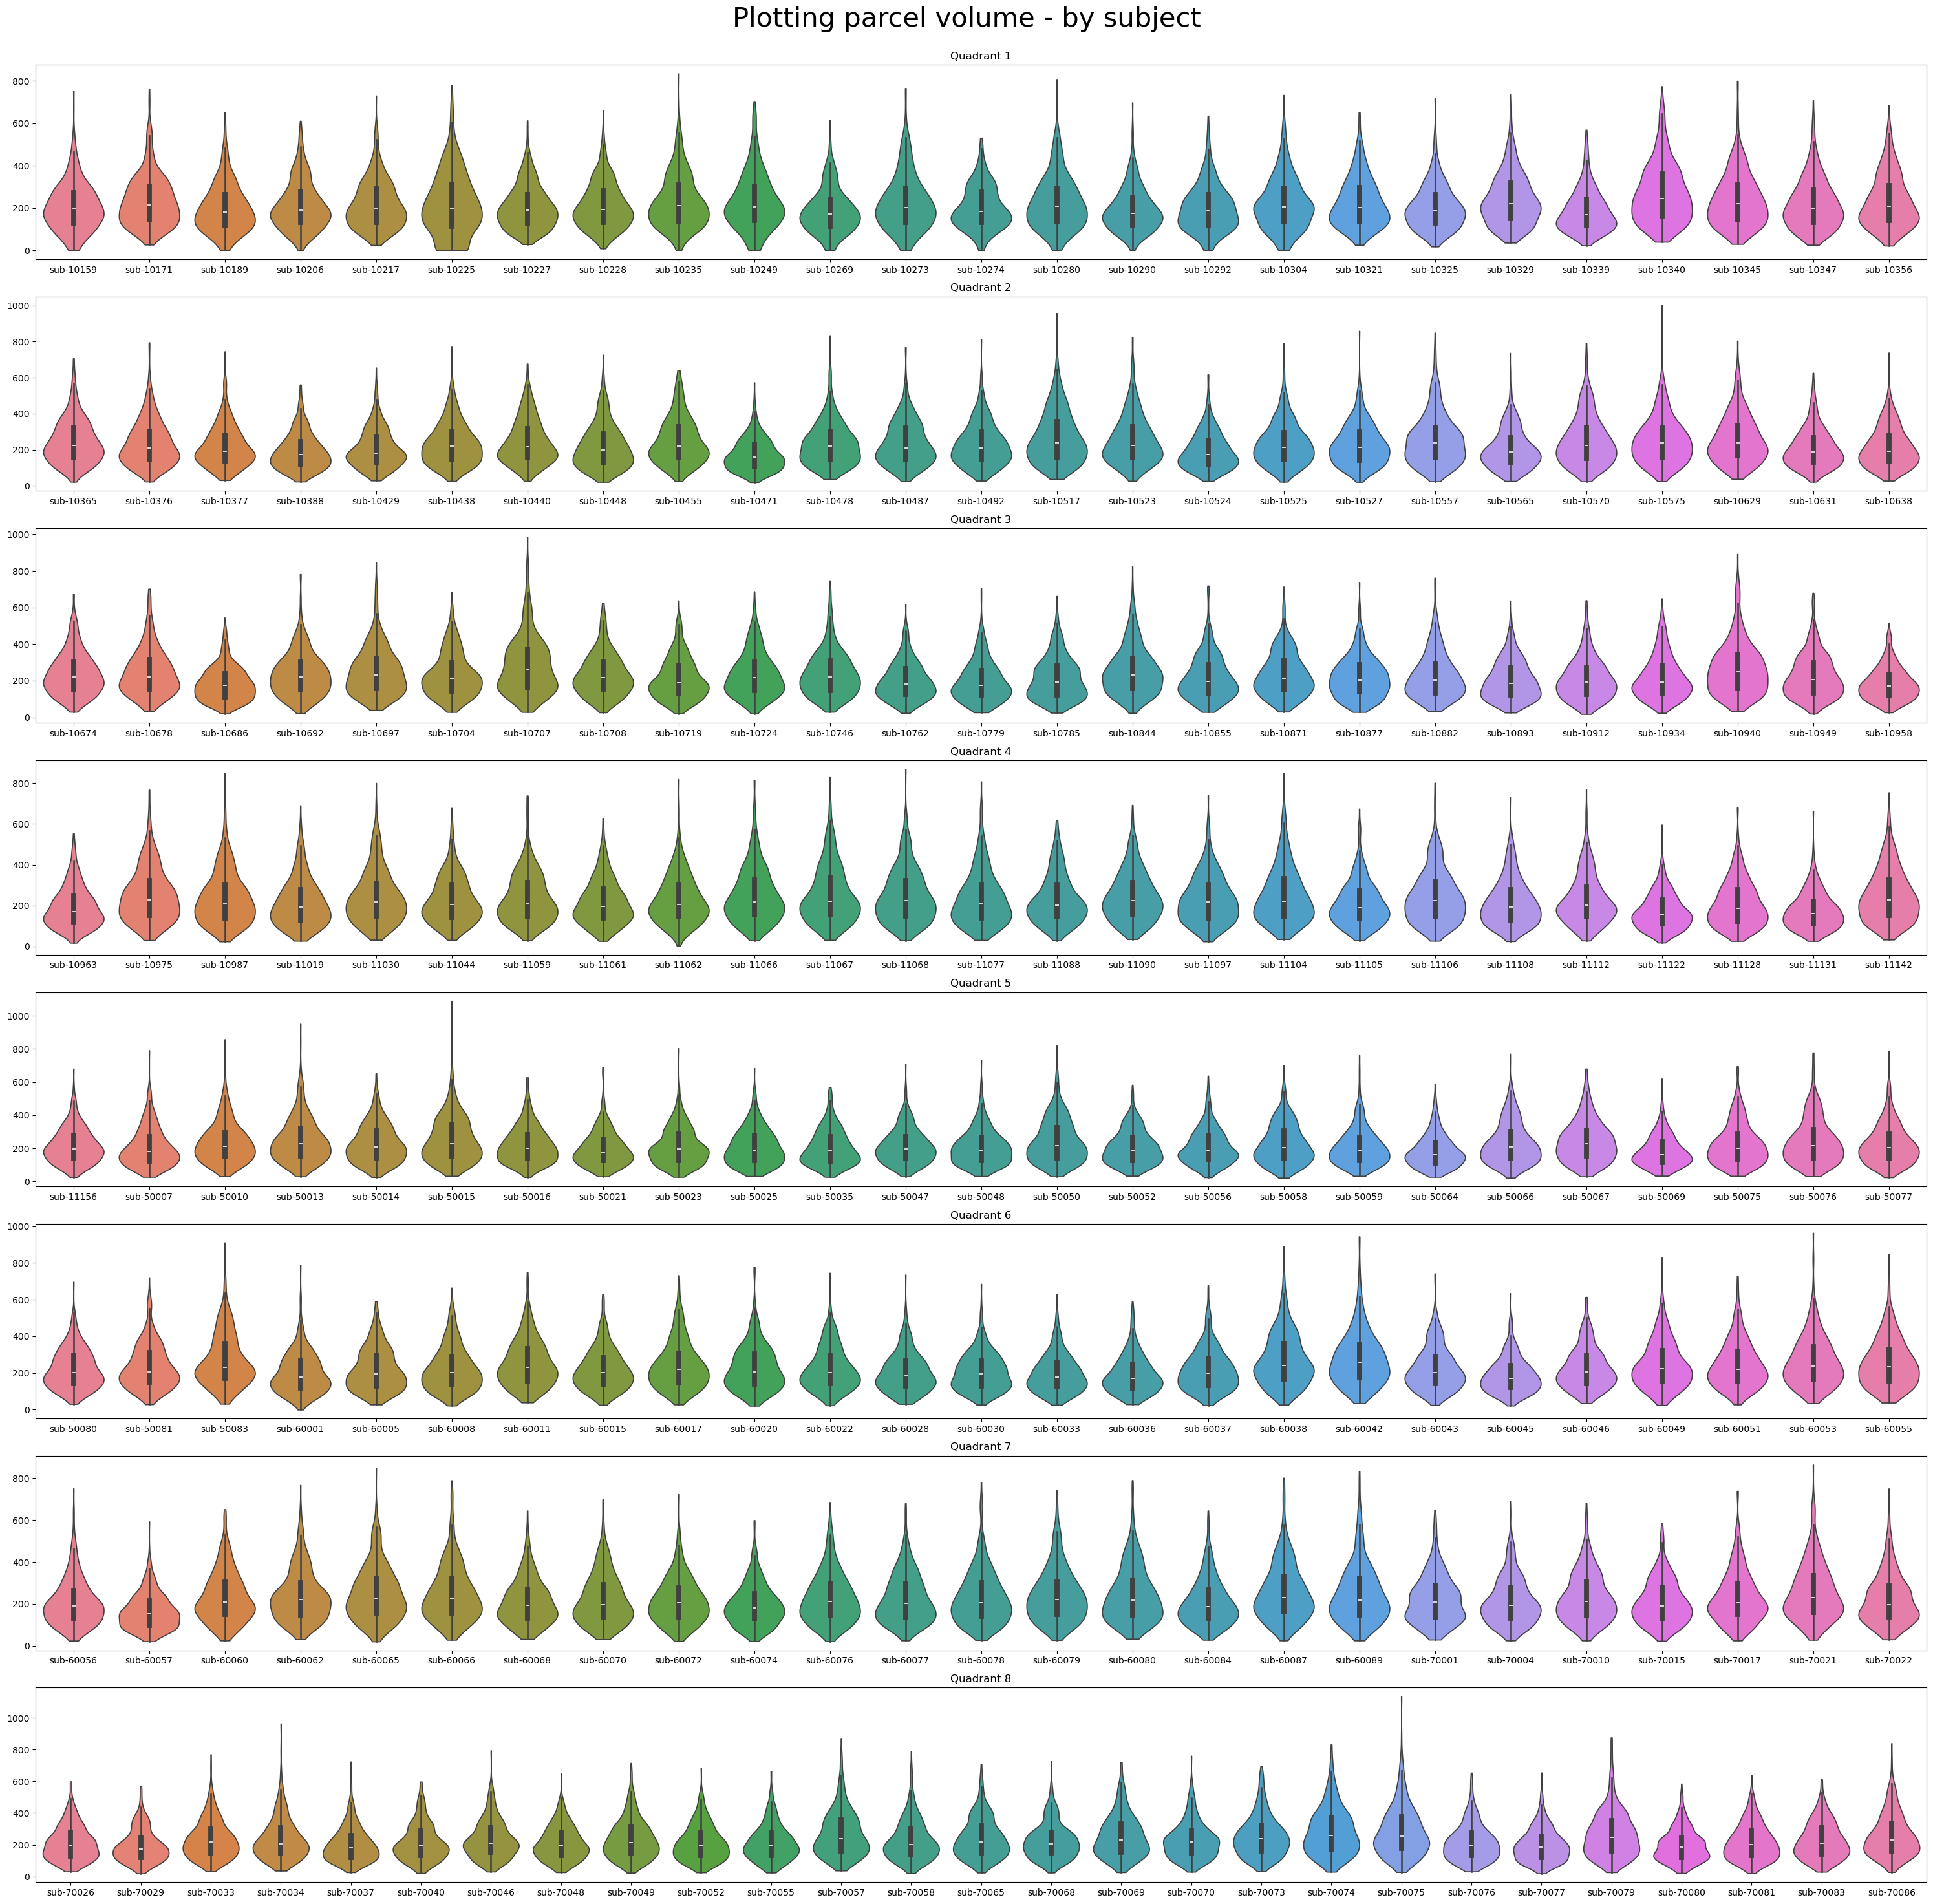

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/concat_vols.tsv", sep='\t')
vols = vols.set_index('Parcels')
vols = vols.reindex(sorted(vols.columns), axis=1)

# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(30, 30))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')
fig.suptitle("Plotting parcel volume - by subject", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

# Get Subjects with 0 entries

In [ ]:
import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/concat_vols.tsv", sep='\t', index_col=0)

# Transpose the DataFrame to have subjects as rows and parcels as columns
df_transposed = df.transpose()

# Check for 0 entries
zero_entries = df_transposed[df_transposed == 0].stack().reset_index()
zero_entries.columns = ['Subject Name', 'Parcel Index', 'Value']

print("Subjects with 0 entries:")
print(zero_entries)
zero_entries.to_csv('/home/gabridele/Desktop/storage_folder/spreading_dynamics_clinical/derivatives/zero_entries.tsv', sep='\t', index=False)

## Plotting parcel volume - by parcel

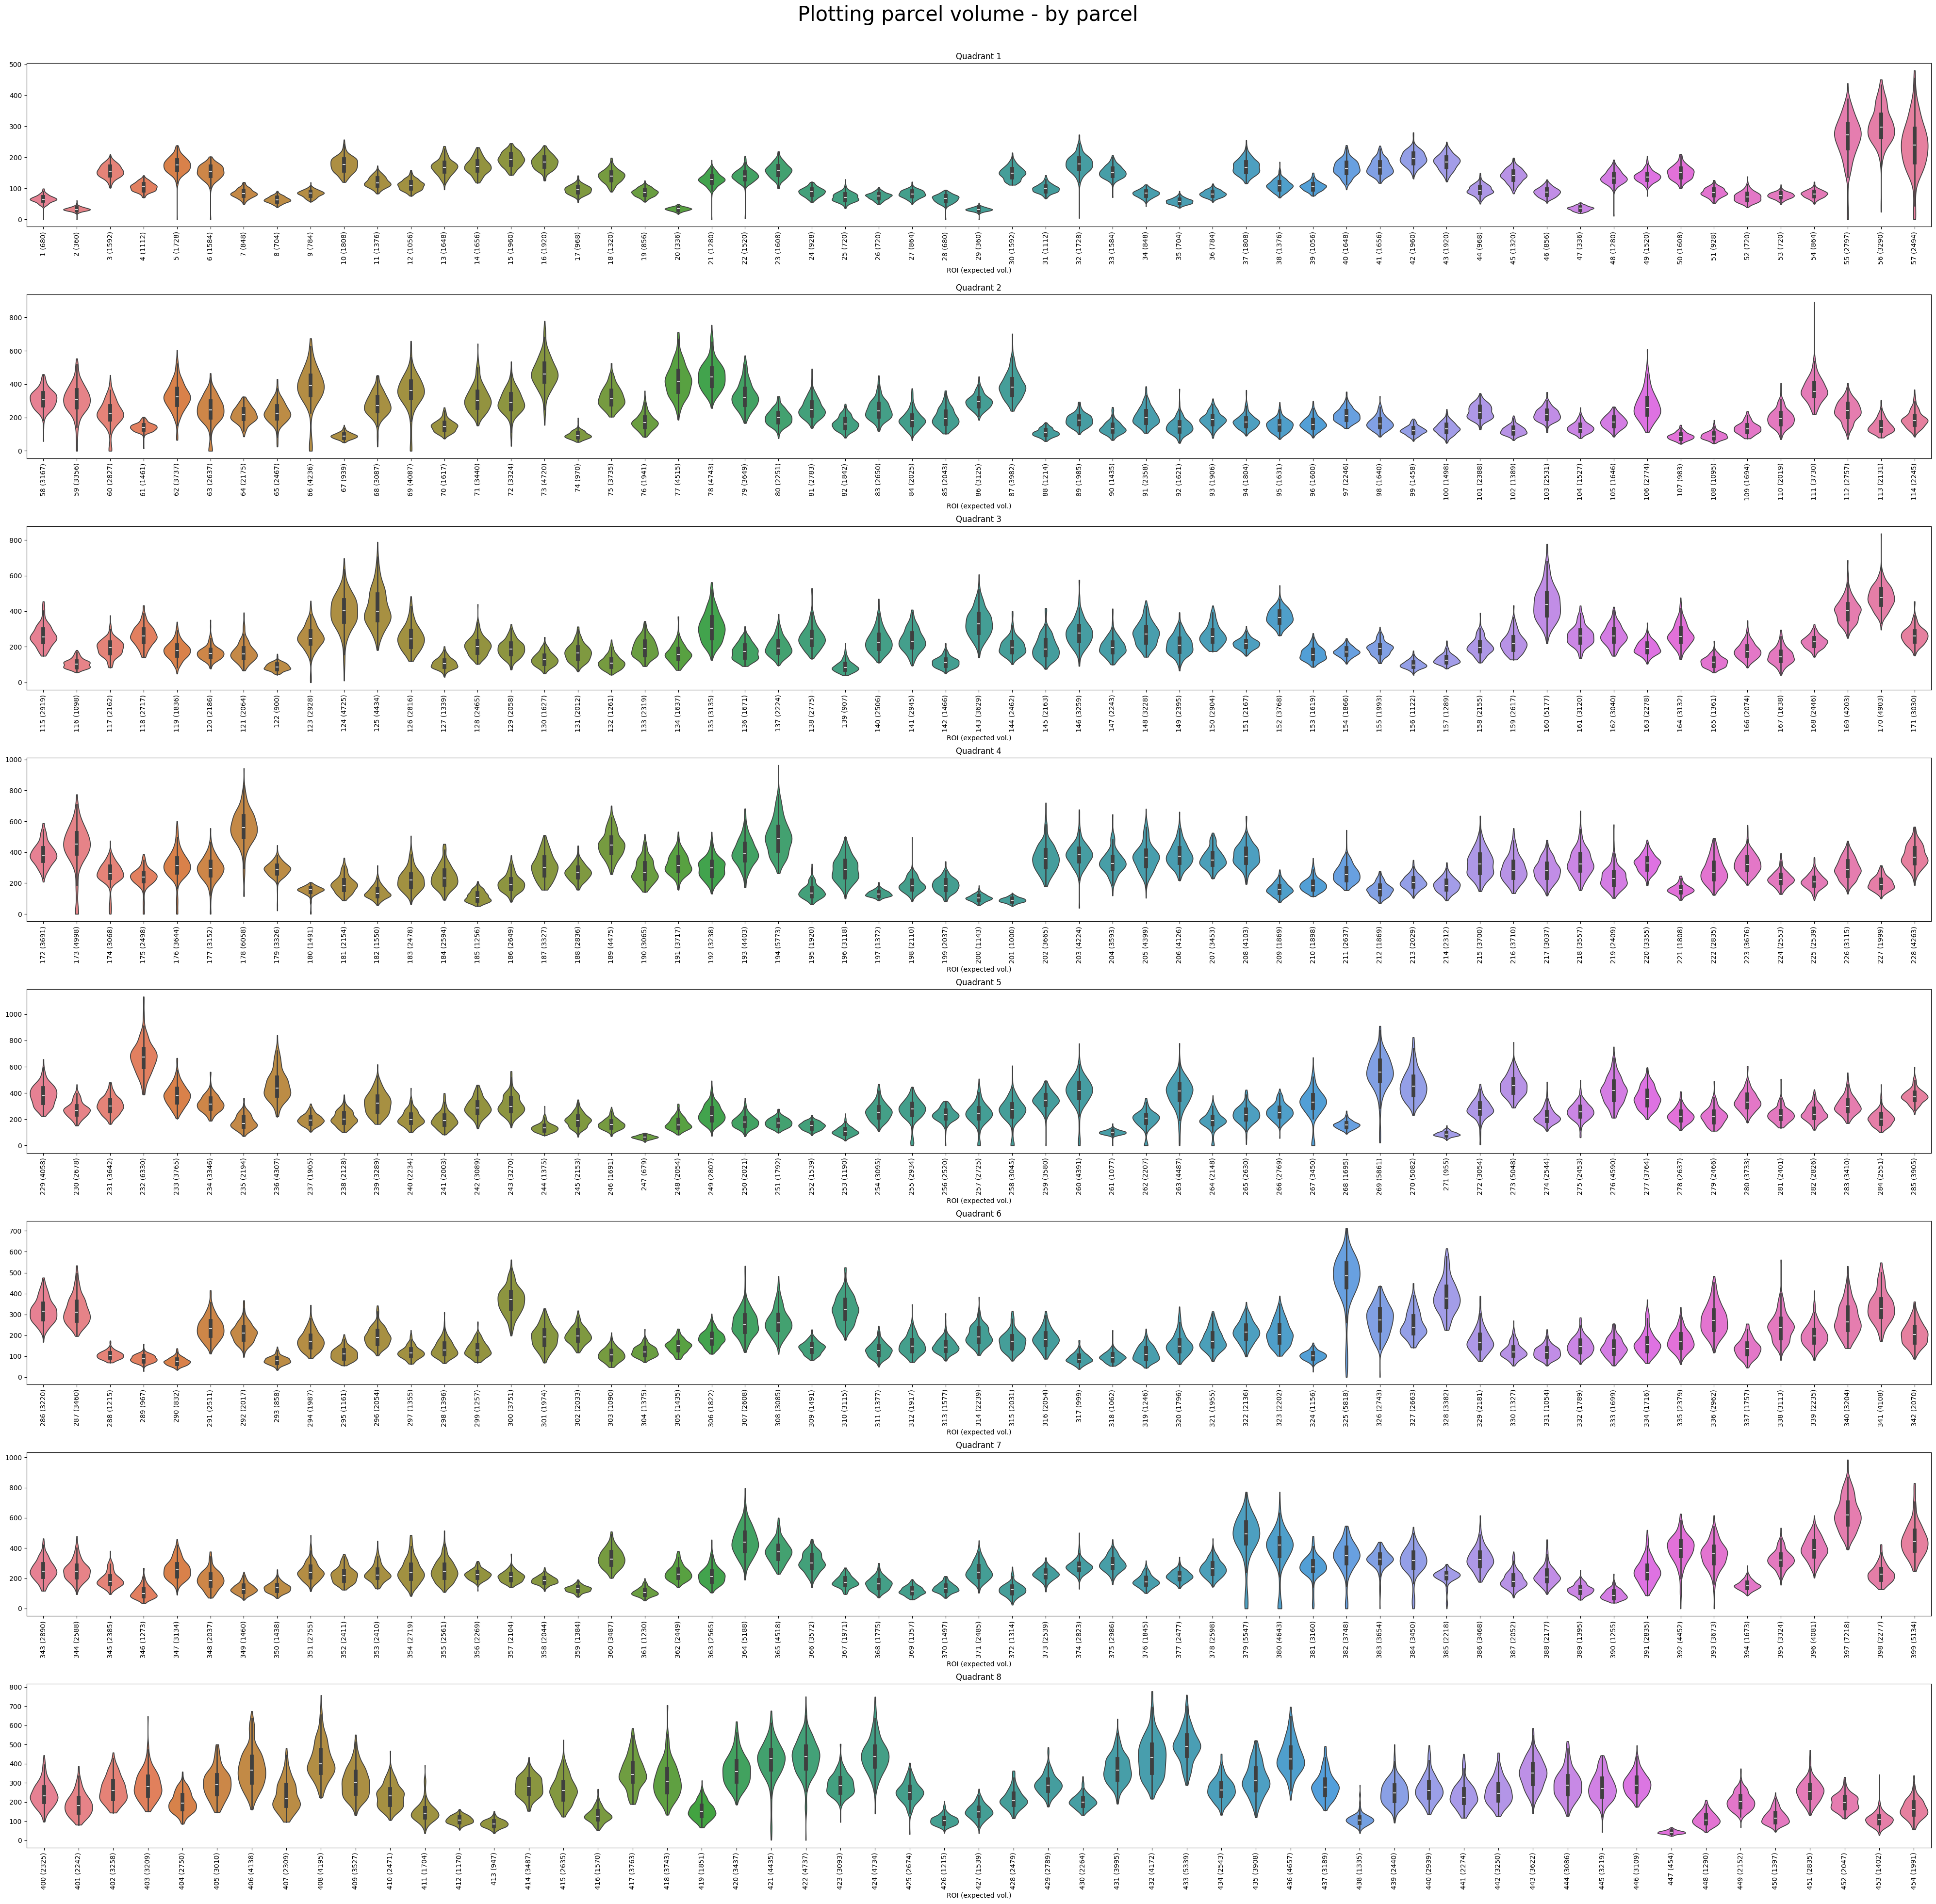

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
vols = pd.read_csv("/Users/gabrieledele/Desktop/GitHub/thesis-work/concat_vols_.tsv", sep='\t')
vols = vols.T
vols.columns = vols.iloc[0]
vols = vols.iloc[1:]  # Remove the first row bc it's repetition of parcels

# Load ROI labels
with open('/Users/gabrieledele/combined.txt') as f:
    roi_labels = [line.split()[0] for line in f]

# Determine the number of subjects and calculate the number of subplots needed
num_parcels = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_parcels // num_subplots

# Calculate the number of subjects in the last quadrant
parcels_remaining = num_parcels % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * (subplots_per_quadrant + 1)
    end_index = (i + 1) * (subplots_per_quadrant + 1)
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

    # Add custom x-axis labels
    x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_xlabel('ROI (expected vol.)')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * (subplots_per_quadrant + 1)
subset_vols = vols.iloc[:, start_index:num_parcels]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')

# Add custom x-axis labels for the last subplot
x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlabel('ROI (expected vol.)')

fig.suptitle("Plotting parcel volume - by parcel", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()


In [59]:
vols = pd.read_csv("/Users/gabrieledele/Desktop/GitHub/thesis-work/concat_vols_.tsv", sep='\t')
vols = vols.T
vols

0    1    2    3    4    5    6    7    8    9    ...  444  445  \
Parcels      1    2    3    4    5    6    7    8    9   10  ...  445  446   
sub-60030   61   33  155  114  144  153   79   62   81  148  ...  277  311   
sub-60033   47   26  142   91  142  126   71   58   74  154  ...  411  215   
sub-11108   68   33  147   89  169  148   89   69   81  145  ...  186  231   
sub-70022   64   35  145  108  181  139   63   60   89  163  ...  227  332   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
sub-10940   74   34  153  127  176  200   93   52   77  257  ...  365  331   
sub-70065   74   43  163  118  180  174   82   73   98  205  ...  300  276   
sub-70037   68   32  148  104  208  129   83   74   93  134  ...  150  318   
sub-50014   64   32  209  137  164  151   84   73   99  190  ...  258  304   
sub-10448   57   30  142   93  144  112   65   56   72  164  ...  201  230   

           446  447  448  449  450  451  452  453  
Parcels    447  448  449  450  451  452  453  454  
sub-60030   41   81  205   98  240  223   94  152  
sub-60033   38  104  161   74  228  224   78  139  
sub-11108   25  127  185  120  214  184  109  105  
sub-70022   35  107  194  114  298  172  129  224  
...        ...  ...  ...  ...  ...  ...  ...  ...  
sub-10940   46  148  194  108  233  250  112  179  
sub-70065   44  102  183   74  288  231  145  216  
sub-70037   48   69  179   95  210  211   73  108  
sub-50014   40   73  211   91  286  209  105  142  
sub-10448   48   83  198  132  308  240  132  196  

[203 rows x 454 columns]

# Divide by disorder

In [57]:
import pandas as pd
import re

# Load data
vols = pd.read_csv("/Users/gabrieledele/Desktop/GitHub/thesis-work/concat_vols_.tsv", sep='\t')

# Define the patterns to group by and their respective labels
patterns_and_labels = {
    'sub-1*': 'CTRL',
    'sub-5*': 'SCZ',
    'sub-6*': 'BPLR',
    'sub-7*': 'ADHD'
}

patterns = list(patterns_and_labels.keys())

# Exclude the first column
df_excluded = vols.iloc[:, 1:]

# Create a function to match patterns
def match_pattern(col, patterns):
    for pattern in patterns:
        if re.match(pattern.replace('*', '.*'), col):
            return pattern
    return None

# Group columns based on patterns
grouped_columns = {}
for pattern in patterns:
    label = patterns_and_labels[pattern]
    grouped_columns[label] = [col for col in df_excluded.columns if match_pattern(col, [pattern])]

# Create and assign separate DataFrames
CTRL = df_excluded[grouped_columns['CTRL']]
SCZ = df_excluded[grouped_columns['SCZ']]
BPLR = df_excluded[grouped_columns['BPLR']]
ADHD = df_excluded[grouped_columns['ADHD']]

# If you need the first column (ID or similar) to be included in each split DataFrame:
#first_column = vols.iloc[:, 0]
#CTRL = pd.concat([first_column, CTRL], axis=1)
#SCZ = pd.concat([first_column, SCZ], axis=1)
#BPLR = pd.concat([first_column, BPLR], axis=1)
#ADHD = pd.concat([first_column, ADHD], axis=1)

# Display the separate DataFrames
print("CTRL DataFrame:")
print(CTRL)

print("\nSCZ DataFrame:")
print(SCZ)

print("\nBPLR DataFrame:")
print(BPLR)

print("\nADHD DataFrame:")
print(ADHD)


CTRL DataFrame:
     sub-11108  sub-10877  sub-10171  sub-11156  sub-10235  sub-10912  \
0           68         66         65         59         68         49   
1           33         29         27         26         38         24   
2          147        149        128        173        179        149   
3           89         81         95        115        116         92   
4          169        198        150        189        147        145   
..         ...        ...        ...        ...        ...        ...   
449        120        126        184        126        176        151   
450        214        253        299        195        318        182   
451        184        142        222        154        166        169   
452        109        148        104         79        118         83   
453        105        238        194        127        139        162   

     sub-10785  sub-10958  sub-10678  sub-10329  ...  sub-10228  sub-11122  \
0           62         56    

IndexError: list index out of range

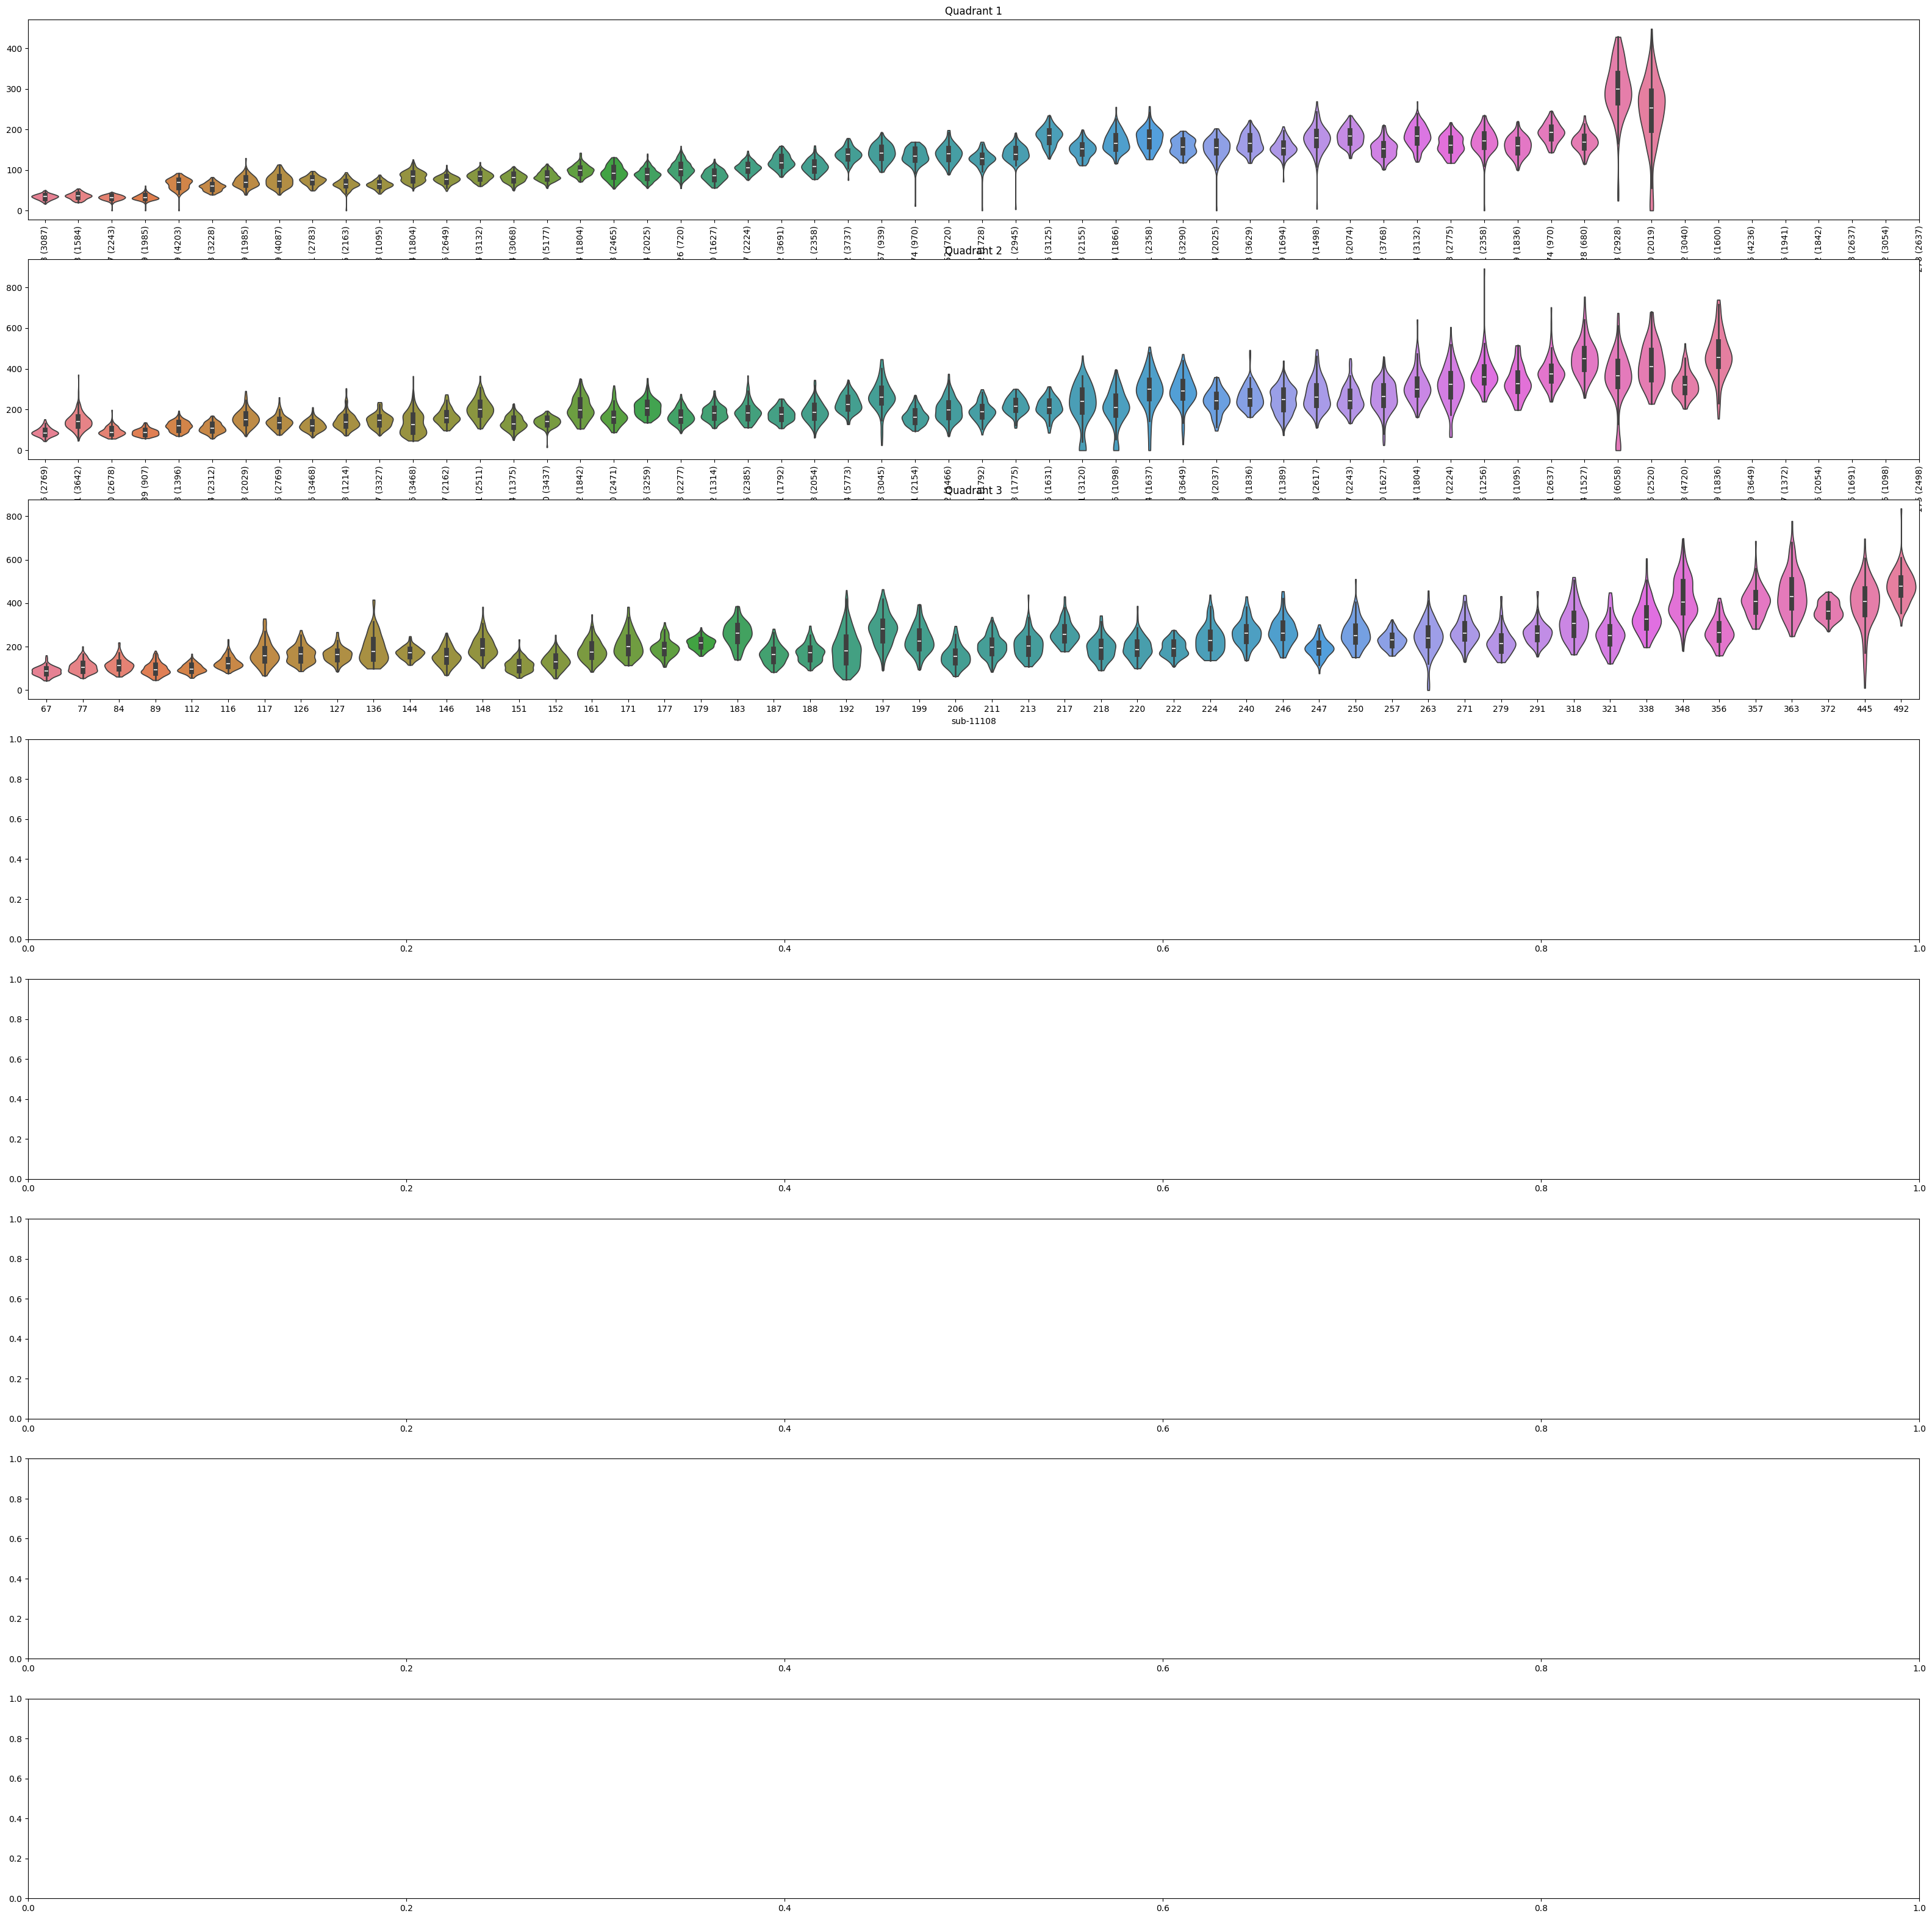

In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
vols = CTRL
vols = vols.T
vols.columns = vols.iloc[0]
#vols = vols.iloc[1:]  # Remove the first row bc it's repetition of parcels

# Load ROI labels
with open('/Users/gabrieledele/combined.txt') as f:
    roi_labels = [line.split()[0] for line in f]

# Determine the number of subjects and calculate the number of subplots needed
num_parcels = 454
num_subplots = 8
subplots_per_quadrant = num_parcels // num_subplots

# Calculate the number of subjects in the last quadrant
parcels_remaining = num_parcels % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * (subplots_per_quadrant + 1)
    end_index = (i + 1) * (subplots_per_quadrant + 1)
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

    # Add custom x-axis labels
    x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_xlabel('ROI (expected vol.)')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * (subplots_per_quadrant + 1)
subset_vols = vols.iloc[:, start_index:num_parcels]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')

# Add custom x-axis labels for the last subplot
x_labels = [f'{col} ({roi_labels[int(col)-1]})' for col in subset_vols.columns]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlabel('ROI (expected vol.)')

fig.suptitle("Plotting parcel volume - by parcel", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()


In [72]:
vols

sub-11108  68   33   147  89   169  148  89   69   81   145  ...  186  231  \
sub-11108   68   33  147   89  169  148   89   69   81  145  ...  186  231   
sub-10877   66   29  149   81  198  188  101   64   94  134  ...  268  348   
sub-10171   65   27  128   95  150  134   73   65   73  200  ...  209  328   
sub-11156   59   26  173  115  189  181   88   61   99  181  ...  247  304   
sub-10235   68   38  179  116  147  156   76   78   96  186  ...  222  369   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
sub-10746   67   35  173  109  184  148  107   65   80  204  ...  244  256   
sub-10274   46   32  168  117  164  136   86   49   81  216  ...  307  253   
sub-11030   82   41  146   92  198  196  100   66   77  201  ...  289  214   
sub-10940   74   34  153  127  176  200   93   52   77  257  ...  365  331   
sub-10448   57   30  142   93  144  112   65   56   72  164  ...  201  230   

sub-11108  25   127  185  120  214  184  109  105  
sub-11108   25  127  185  120  214  184  109  105  
sub-10877   68  120  217  126  253  142  148  238  
sub-10171   45  126  259  184  299  222  104  194  
sub-11156   35  114  174  126  195  154   79  127  
sub-10235   48  119  279  176  318  166  118  139  
...        ...  ...  ...  ...  ...  ...  ...  ...  
sub-10746   39   79  214  119  266  243  149  175  
sub-10274   23   95  157  125  162  162   82  124  
sub-11030   40  103  152   98  273  226  111  193  
sub-10940   46  148  194  108  233  250  112  179  
sub-10448   48   83  198  132  308  240  132  196  

[101 rows x 454 columns]